# Visualizing Dog Breeds using K-Means Clustering
https://www.kaggle.com/puppygogo/sa-dog-ownership-sample

# Load Data
1. Load Data
1. Select Dimensions

In [3]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans

In [5]:
dogs = pd.read_csv('AKC_Breed_Info.csv',encoding = "ISO-8859-1")

In [6]:
dogs.shape

(148, 5)

In [7]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 5 columns):
Breed                 148 non-null object
height_low_inches     148 non-null float64
height_high_inches    148 non-null float64
weight_low_lbs        148 non-null int64
weight_high_lbs       148 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 5.9+ KB


In [8]:
dogs.sample(5)

,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
54,American Water Spaniel,15.0,18.0,25,45
137,Chihuahua,6.0,9.0,2,5
66,Cocker Spaniel-American,15.0,16.0,22,28
145,Poodle Toy,10.0,10.0,10,10
23,Black And Tan Coonhound,23.0,27.0,50,75


In [9]:
# Create an average height and an average weight metric

dogs['avg_height'] = (dogs['height_low_inches'] + dogs['height_high_inches'])/2

dogs['avg_weight'] = (dogs['weight_low_lbs'] + dogs['weight_high_lbs'])/2

In [10]:
to_drop = ['Breed','height_low_inches','height_high_inches',
           'weight_low_lbs','weight_high_lbs']

dogs_clustering = dogs.drop(to_drop, axis=1)

In [11]:
dogs_clustering.sample(5)

,avg_height,avg_weight
23,25.0,62.5
17,26.0,55.0
135,20.0,28.5
136,10.5,10.0
56,20.5,50.0


In [12]:
# Now that I only have the two dimensions, and they are floats, i'll convert to numpy array

dataset_array = dogs_clustering.values
print(dataset_array.dtype)
print(dataset_array)

float64
[[ 27.  100. ]
 [ 28.  125. ]
 [ 25.   97.5]
 [ 25.  100. ]
 [ 27.   85. ]
 [ 26.  115. ]
 [ 32.  140. ]
 [ 29.5 107.5]
 [ 25.5 140. ]
 [ 31.5 120. ]
 [ 29.   95. ]
 [ 28.5 182.5]
 [ 27.  125. ]
 [ 27.  125. ]
 [ 25.   87.5]
 [ 24.5 100. ]
 [ 26.5 150. ]
 [ 26.   55. ]
 [ 23.5  67.5]
 [ 25.5 110. ]
 [ 24.   62.5]
 [ 24.   67.5]
 [ 24.   67.5]
 [ 25.   62.5]
 [ 27.  110. ]
 [ 25.   85. ]
 [ 23.   67.5]
 [ 25.   75. ]
 [ 23.5  65. ]
 [ 19.5  50. ]
 [ 24.   62.5]
 [ 26.   72.5]
 [ 27.   80. ]
 [ 23.5  67.5]
 [ 25.   62.5]
 [ 24.   82.5]
 [ 23.5  65. ]
 [ 24.   65. ]
 [ 26.5  72.5]
 [ 22.5  65. ]
 [ 25.   62.5]
 [ 28.5  65. ]
 [ 26.   65. ]
 [ 31.  107.5]
 [ 22.5  67.5]
 [ 22.   62.5]
 [ 20.   45. ]
 [ 25.5  77.5]
 [ 30.   92.5]
 [ 25.5  72.5]
 [ 25.  155. ]
 [ 26.   77.5]
 [ 23.   45. ]
 [ 18.   45. ]
 [ 16.5  35. ]
 [ 18.5  40. ]
 [ 20.5  50. ]
 [ 14.   45. ]
 [ 21.   50. ]
 [ 20.   40. ]
 [ 19.   35. ]
 [ 14.   55. ]
 [ 21.5  60. ]
 [ 21.5  45. ]
 [ 19.   50. ]
 [ 20.5  50. ]
 [

# K-Means Clustering
For references to what K-Means is and how it works, this is a good reference
* http://scikit-learn.org/stable/modules/clustering.html#k-means

In [13]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0)
y_km = km.fit_predict(dataset_array)

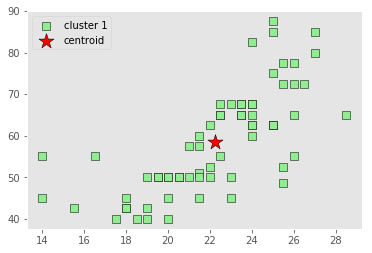

In [14]:
# Cluster 1 and centroid

plt.scatter(dataset_array[y_km == 0, 0],
            dataset_array[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')


plt.scatter(km.cluster_centers_[0, 0],
            km.cluster_centers_[0, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroid')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

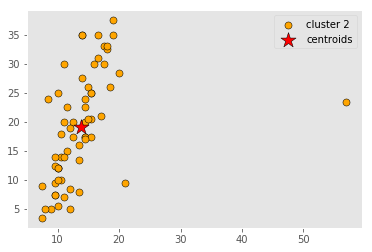

In [15]:
# Cluster 2 and centroid
plt.scatter(dataset_array[y_km == 1, 0],
            dataset_array[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')

plt.scatter(km.cluster_centers_[1, 0],
            km.cluster_centers_[1, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

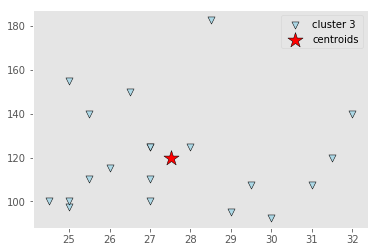

In [16]:
# Cluster 3 and centroid
plt.scatter(dataset_array[y_km == 2, 0],
            dataset_array[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')

plt.scatter(km.cluster_centers_[2, 0],
            km.cluster_centers_[2, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

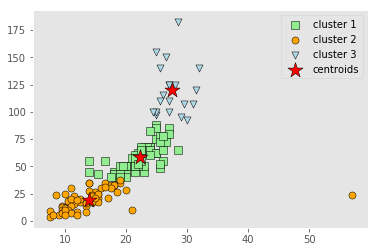

In [17]:
# This is an aggregate scatter plot of all the clusters on the same graph
plt.scatter(dataset_array[y_km == 0, 0],
            dataset_array[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')

plt.scatter(dataset_array[y_km == 1, 0],
            dataset_array[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')

plt.scatter(dataset_array[y_km == 2, 0],
            dataset_array[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

# Elbow Plot
This helps visualize the best number of clusters to choose based on where the "joint" of the graph is. In this case, it looks like that joint, while not sharply defined, is at k=3

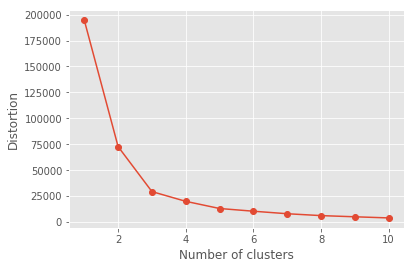

In [18]:
distortions = []
for i in range(1, 11):

    km = KMeans(n_clusters=i,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)

    km.fit(dataset_array)
    distortions.append(km.inertia_)

    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Silhouette Analaysis
http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [19]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

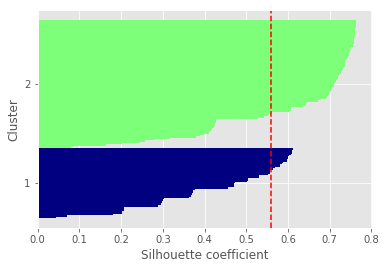

In [20]:
# 2 Clusters
km = KMeans(n_clusters=2,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0)
y_km = km.fit_predict(dataset_array)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(dataset_array, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

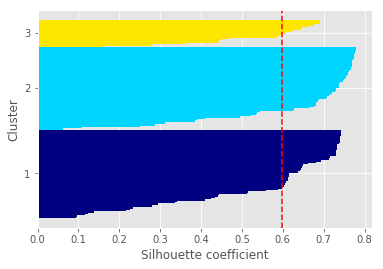

In [21]:
# 3 Clusters
km = KMeans(n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0)
y_km = km.fit_predict(dataset_array)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(dataset_array, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

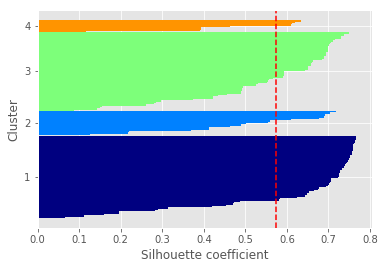

In [22]:
# 4 Clusters
km = KMeans(n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0)
y_km = km.fit_predict(dataset_array)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(dataset_array, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

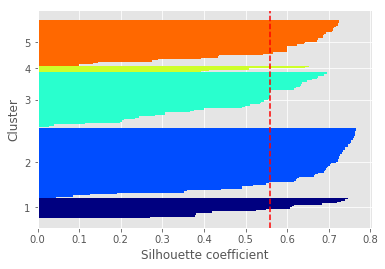

In [23]:
# 5 Clusters
km = KMeans(n_clusters=5,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0)
y_km = km.fit_predict(dataset_array)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(dataset_array, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

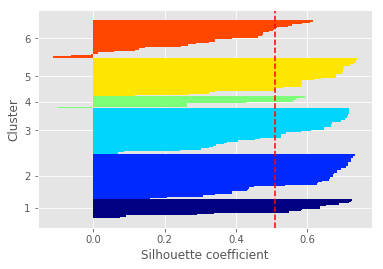

In [24]:
# 6 Clusters
km = KMeans(n_clusters=6,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0)
y_km = km.fit_predict(dataset_array)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(dataset_array, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()